In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pycta.portfolio import Portfolio
from pycta.analysis import Analysis

In [2]:
# Load prices
prices = pd.read_csv("data/p_ob.csv", index_col=0, parse_dates=True).ffill().truncate(before="1970-01-01")

In [3]:
# take two moving averages and apply the sign-function, adjust by volatility
def f(price, fast=32, slow=96, volatility=32):
    s = price.ewm(com=slow, min_periods=300).mean()
    f = price.ewm(com=fast, min_periods=300).mean()
    std = price.pct_change().ewm(com=volatility, min_periods=300).std()
    return np.sign(f-s)/std

In [4]:
from ipywidgets import Label, HBox, VBox, IntSlider

fast = IntSlider(min=4, max=192, step=4, value=32)
slow = IntSlider(min=4, max=192, step=4, value=96)
vola = IntSlider(min=4, max=192, step=4, value=32)
left_box = VBox([Label("Fast Moving Average"), Label("Slow Moving Average"), Label("Volatility")])
right_box = VBox([fast, slow, vola])
HBox([left_box, right_box])

In [6]:
portfolio = Portfolio(prices=prices, position=prices.apply(f, fast=fast.value, slow=slow.value, volatility=vola.value))

In [7]:
a = Analysis(portfolio.nav())
a.performance

Performance number
Annua Return                        13.60
Annua Volatility                    16.03
Annua Sharpe Ratio (r_f = 0)         0.85
Max Drawdown                        50.05
Return                          51,593.59
Kurtosis                             5.91
dtype: object

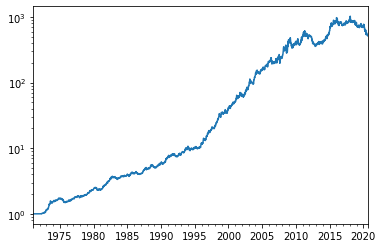

In [8]:
a.nav.plot(logy=True)
plt.show()

In [9]:
a.monthlytable

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,STDev,YTD
Year,,,,,,,,,,,,,,
2020,1.52%,-6.12%,-10.91%,1.13%,-6.70%,-3.21%,-3.91%,-4.01%,,,,,14.16%,-28.48%
2019,-11.15%,-1.47%,2.67%,3.18%,-8.29%,3.72%,3.65%,7.52%,-7.08%,-4.50%,3.95%,-1.42%,20.28%,-10.58%
2018,4.73%,-10.23%,-1.62%,-1.02%,-4.63%,2.55%,2.08%,3.42%,-1.73%,-9.39%,-3.30%,6.41%,18.21%,-13.40%
2017,-3.39%,7.99%,-2.37%,2.77%,3.10%,-2.51%,0.35%,2.07%,-0.11%,6.96%,-0.56%,6.97%,13.56%,22.48%
2016,6.76%,4.37%,-11.68%,-8.85%,-2.18%,9.85%,3.06%,-3.26%,3.51%,-8.64%,-1.34%,0.83%,23.03%,-9.61%
2015,16.31%,-0.36%,13.31%,-8.38%,4.75%,-3.71%,17.83%,-6.53%,5.14%,-7.52%,7.48%,-2.14%,32.11%,36.70%
2014,2.23%,4.37%,0.49%,2.48%,4.84%,3.40%,-3.87%,7.58%,4.27%,-1.26%,8.78%,6.97%,12.72%,47.59%
2013,1.46%,1.71%,1.92%,5.31%,1.18%,-5.60%,5.07%,-3.76%,-1.12%,4.46%,4.89%,-2.53%,12.66%,12.98%
2012,2.77%,-2.26%,-1.61%,-0.36%,-8.39%,-14.30%,5.41%,-5.43%,-2.37%,-1.84%,1.21%,-2.32%,17.86%,-26.99%


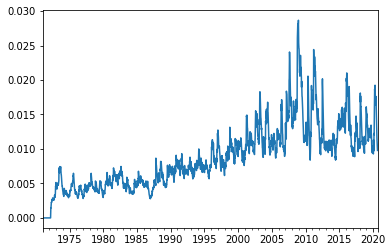

In [10]:
a.std.plot(kind="line")
plt.show()


* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position
* Only 3 **free parameters** used here.
* Only 4 lines of code
* Scaling the bet-size by volatility has improved the situation.

Results do not look terrible but...
* No concept of risk integrated 

Often hedge funds outsource the risk management to some board or committee
and develop machinery for more systematic **parameter-hacking**.